# Introduction to Data Analysis with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Handle tabular data with `pandas`

# The Python scientific stack: SciPy

Python Main Data Libraries

NumPy: Base N-dimensional array package

SciPy library: Fundamental library for scientific computing

Matplotlib: Comprehensive 2D Plotting

IPython: Enhanced Interactive Console

Sympy: Symbolic mathematics

pandas: Data structures & analysis

## `pandas`

### Getting started with pandas

In [1]:
import pandas as pd

### `pandas` data structures

### Series

The base pandas abstraction. You can thing of it as the love child of a numpy array and a dictionary.

In [2]:
pd.Series([8, 7, 9, 0])

0    8
1    7
2    9
3    0
dtype: int64

If we provide an index, pandas will use it. If not, it will automatically create one.

In [4]:
s = pd.Series([8, 7, 9, 0], index=list('abcd'))
s

a    8
b    7
c    9
d    0
dtype: int64

In [5]:
s.index, s.values

(Index(['a', 'b', 'c', 'd'], dtype='object'), array([8, 7, 9, 0]))

In [8]:
import numpy as np

np.cumsum(s)

a     8
b    15
c    24
d    24
dtype: int64

We can create Series from dictionaries:

In [9]:
s2 = pd.Series({'a' : 7, 'x' : 2, 'y' : 5})
s2

a    7
x    2
y    5
dtype: int64

In [10]:
s['a']

8

And here is where the magic happens: numpy arrays only identify their contents by position. In contrast, pandas knows their "name" and will align them based on their indexes:

In [11]:
s.values + s2.values

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [12]:
s + s2

a    15.0
b     NaN
c     NaN
d     NaN
x     NaN
y     NaN
dtype: float64

In [13]:
s * 2.3

a    18.4
b    16.1
c    20.7
d     0.0
dtype: float64

In [14]:
s % 2

a    0
b    1
c    1
d    0
dtype: int64

In [15]:
s % 2 == 0

a     True
b    False
c    False
d     True
dtype: bool

In [16]:
s[s % 2 == 0] 

a    8
d    0
dtype: int64

### DataFrame

This is the object you'll work most of the time with. It represents a table of _m_ observations x _n_ variables. Each variable, or column, is a Series.


```python
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
```

In [19]:
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
df

province  population  year
0        M   1500000.0  1900
1        M   2000000.0  1950
2        M   3000000.0  2000
3        B    500000.0  1900
4        B   1500000.0  2000

In [20]:
df2 = pd.DataFrame(dfdata, columns = ['province', 'population', 'year', 'debt'])
df2

province  population  year debt
0        M   1500000.0  1900  NaN
1        M   2000000.0  1950  NaN
2        M   3000000.0  2000  NaN
3        B    500000.0  1900  NaN
4        B   1500000.0  2000  NaN

In [21]:
df['province']

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

In [24]:
df.province

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

In [25]:
import numpy as np

df['2nd_language'] = np.nan
df['2nd_language']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2nd_language, dtype: float64

In [26]:
df.2nd_language

SyntaxError: invalid syntax (<ipython-input-26-496e2d870a07>, line 1)

In [27]:
df.count()

province        5
population      5
year            5
2nd_language    0
dtype: int64

In [28]:
df['count'] = 0
df.count

<bound method DataFrame.count of   province  population  year  2nd_language  count
0        M   1500000.0  1900           NaN      0
1        M   2000000.0  1950           NaN      0
2        M   3000000.0  2000           NaN      0
3        B    500000.0  1900           NaN      0
4        B   1500000.0  2000           NaN      0>

In [29]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [30]:
df.index = list('abcde')
df

province  population  year  2nd_language  count
a        M   1500000.0  1900           NaN      0
b        M   2000000.0  1950           NaN      0
c        M   3000000.0  2000           NaN      0
d        B    500000.0  1900           NaN      0
e        B   1500000.0  2000           NaN      0

In [37]:
df[2] = 'holi'
df

province  population  year  2nd_language  count     2
a        M   1500000.0  1900           NaN      0  holi
b        M   2000000.0  1950           NaN      0  holi
c        M   3000000.0  2000           NaN      0  holi
d        B    500000.0  1900           NaN      0  holi
e        B   1500000.0  2000           NaN      0  holi

In [39]:
2 == '2'

False

In [38]:
df['2']

KeyError: '2'

In [40]:
df.loc['d']

province             B
population      500000
year              1900
2nd_language       NaN
count                0
2                 holi
Name: d, dtype: object

In [42]:
df.iloc[3]

province             B
population      500000
year              1900
2nd_language       NaN
count                0
2                 holi
Name: d, dtype: object

In [43]:
df[0:2]

province  population  year  2nd_language  count     2
a        M   1500000.0  1900           NaN      0  holi
b        M   2000000.0  1950           NaN      0  holi

In [44]:
df.iloc[0:2]

province  population  year  2nd_language  count     2
a        M   1500000.0  1900           NaN      0  holi
b        M   2000000.0  1950           NaN      0  holi

In [45]:
df.T

a      b      c       d        e
province            M      M      M       B        B
population    1.5e+06  2e+06  3e+06  500000  1.5e+06
year             1900   1950   2000    1900     2000
2nd_language      NaN    NaN    NaN     NaN      NaN
count               0      0      0       0        0
2                holi   holi   holi    holi     holi

In [46]:
df['capital'] = df['province'] == 'M'
df

province  population  year  2nd_language  count     2  capital
a        M   1500000.0  1900           NaN      0  holi     True
b        M   2000000.0  1950           NaN      0  holi     True
c        M   3000000.0  2000           NaN      0  holi     True
d        B    500000.0  1900           NaN      0  holi    False
e        B   1500000.0  2000           NaN      0  holi    False

In [53]:
df['year'][2] = np.nan


<ipython-input-53-e3c613df9083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][2] = np.nan


ValueError: cannot convert float NaN to integer

In [55]:
df.dtypes

province         object
population      float64
year              int64
2nd_language    float64
count             int64
2                object
capital            bool
dtype: object

In [57]:
type(np.nan)

float

In [58]:
df.describe()

population    year  2nd_language  count
count  5.000000e+00     5.0           0.0    5.0
mean   1.700000e+06  1950.0           NaN    0.0
std    9.082951e+05    50.0           NaN    0.0
min    5.000000e+05  1900.0           NaN    0.0
25%    1.500000e+06  1900.0           NaN    0.0
50%    1.500000e+06  1950.0           NaN    0.0
75%    2.000000e+06  2000.0           NaN    0.0
max    3.000000e+06  2000.0           NaN    0.0

In [62]:
df['mejor_profe_ever'] = 'dani'
df

province  population  year  2nd_language  count     2  capital  \
a        M   1500000.0  1900           NaN      0  holi     True   
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   
d        B    500000.0  1900           NaN      0  holi    False   
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
a             dani  
b             dani  
c             dani  
d             dani  
e             dani

### Index objects

Indexes are immutable.

In [46]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [47]:
df.columns

Index(['province', 'population', 'year', '2nd_language', 'count', 'capital'], dtype='object')

In [49]:
df.index[2] = 'x'

TypeError: Index does not support mutable operations

In [51]:
df.index[2]

'c'

In [52]:
df.index[2:]

Index(['c', 'd', 'e'], dtype='object')

### Dropping entries from an axis

In [60]:
s2 = pd.Series(np.random.randn(6), index = list('poiueh'))
s2

p    0.819762
o    0.167405
i   -0.203209
u   -0.586794
e   -1.794792
h    2.638389
dtype: float64

In [61]:
s2.drop(['p', 'e'])

o    0.167405
i   -0.203209
u   -0.586794
h    2.638389
dtype: float64

By default, `drop()` doesn't modify the original Series- it creates a copy. We can change that with the argument `inplace`.

In [63]:
s2

p    0.819762
o    0.167405
i   -0.203209
u   -0.586794
e   -1.794792
h    2.638389
dtype: float64

In [64]:
s2.drop(['i'], inplace=True)

In [63]:
s2

a    7
x    2
y    5
dtype: int64

In [64]:
df.drop('c')

province  population  year  2nd_language  count     2  capital  \
a        M   1500000.0  1900           NaN      0  holi     True   
b        M   2000000.0  1950           NaN      0  holi     True   
d        B    500000.0  1900           NaN      0  holi    False   
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
a             dani  
b             dani  
d             dani  
e             dani

In [65]:
df.drop('2nd_language', axis=1)

province  population  year  count     2  capital mejor_profe_ever
a        M   1500000.0  1900      0  holi     True             dani
b        M   2000000.0  1950      0  holi     True             dani
c        5   3000000.0  2000      0  holi     True             dani
d        B    500000.0  1900      0  holi    False             dani
e        B   1500000.0  2000      0  holi    False             dani

### Indexing, selection, and filtering

The key here is that we can build boolean Series that we can use to index the original Series or DataFrame. Those booleans can be combined with bitwise boolean operators (&, |, ~) to get filters that are as complex as we need. 

In [66]:
s3 = pd.Series([3e6, 6e6, 1.2e5, 7e5], index=list('BMPV'))
s3

B    3000000.0
M    6000000.0
P     120000.0
V     700000.0
dtype: float64

In [67]:
s3['P']

120000.0

In [68]:
s3[['P', 'M']]

P     120000.0
M    6000000.0
dtype: float64

In [69]:
s3[2]

120000.0

In [70]:
s3[2:]

P    120000.0
V    700000.0
dtype: float64

In [71]:
s3['P':]

P    120000.0
V    700000.0
dtype: float64

In [72]:
s3 > 2e5

B     True
M     True
P    False
V     True
dtype: bool

In [73]:
s3[s3 > 2e5] 

B    3000000.0
M    6000000.0
V     700000.0
dtype: float64

In [74]:
df[df['population'] >= 2e6 ]

province  population  year  2nd_language  count     2  capital  \
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   

  mejor_profe_ever  
b             dani  
c             dani

In [75]:
df[df['population'] >= 2e6 ]['province']

b    M
c    5
Name: province, dtype: object

In [80]:
df[(df['population'] < 2e6) & (df['year'] > 1950)]

province  population  year  2nd_language  count     2  capital  \
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
e             dani

In [81]:
small = df['population'] < 2e6
recent = df['year'] > 1950

small, recent, small & recent

(a     True
 b    False
 c    False
 d     True
 e     True
 Name: population, dtype: bool,
 a    False
 b    False
 c     True
 d    False
 e     True
 Name: year, dtype: bool,
 a    False
 b    False
 c    False
 d    False
 e     True
 dtype: bool)

In [82]:
small | recent

a     True
b    False
c     True
d     True
e     True
dtype: bool

In [83]:
df[~recent]['year']

a    1900
b    1950
d    1900
Name: year, dtype: int64

### Function application and mapping

Function application and mapping allows us to modify the elements of a DataFrame (columns with apply or elements with applymap) without for loops. This way we are not constrained to the functions already implemented by pandas or numpy.

In [85]:
np.sqrt(df['population'])

a    1224.744871
b    1414.213562
c    1732.050808
d     707.106781
e    1224.744871
Name: population, dtype: float64

In [86]:
import math
math.sqrt(s3)

TypeError: cannot convert the series to <class 'float'>

In [89]:
s3.apply(math.sqrt)

B    1732.050808
M    2449.489743
P     346.410162
V     836.660027
dtype: float64

This is a typical use case for lambdas (anonymous functions)

In [90]:
df['province'].apply(lambda arg: 'Madrid' if arg == 'M' else 'Barcelona')

a       Madrid
b       Madrid
c    Barcelona
d    Barcelona
e    Barcelona
Name: province, dtype: object

In [91]:
df.apply(print)

a    M
b    M
c    5
d    B
e    B
Name: province, dtype: object
a    1500000.0
b    2000000.0
c    3000000.0
d     500000.0
e    1500000.0
Name: population, dtype: float64
a    1900
b    1950
c    2000
d    1900
e    2000
Name: year, dtype: int64
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
Name: 2nd_language, dtype: float64
a    0
b    0
c    0
d    0
e    0
Name: count, dtype: int64
a    holi
b    holi
c    holi
d    holi
e    holi
Name: 2, dtype: object
a     True
b     True
c     True
d    False
e    False
Name: capital, dtype: bool
a    dani
b    dani
c    dani
d    dani
e    dani
Name: mejor_profe_ever, dtype: object


province            None
population          None
year                None
2nd_language        None
count               None
2                   None
capital             None
mejor_profe_ever    None
dtype: object

In [93]:
df.applymap(type)

province       population           year     2nd_language  \
a  <class 'str'>  <class 'float'>  <class 'int'>  <class 'float'>   
b  <class 'str'>  <class 'float'>  <class 'int'>  <class 'float'>   
c  <class 'int'>  <class 'float'>  <class 'int'>  <class 'float'>   
d  <class 'str'>  <class 'float'>  <class 'int'>  <class 'float'>   
e  <class 'str'>  <class 'float'>  <class 'int'>  <class 'float'>   

           count              2         capital mejor_profe_ever  
a  <class 'int'>  <class 'str'>  <class 'bool'>    <class 'str'>  
b  <class 'int'>  <class 'str'>  <class 'bool'>    <class 'str'>  
c  <class 'int'>  <class 'str'>  <class 'bool'>    <class 'str'>  
d  <class 'int'>  <class 'str'>  <class 'bool'>    <class 'str'>  
e  <class 'int'>  <class 'str'>  <class 'bool'>    <class 'str'>

In [94]:
sx = pd.Series(range(1000000))

In [95]:
%%timeit

np.sqrt(sx)

2.85 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [96]:
%%timeit

sx.apply(math.sqrt)

232 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Sorting and ranking

In [97]:
s3.sort_values()

P     120000.0
V     700000.0
B    3000000.0
M    6000000.0
dtype: float64

In [98]:
s3.sort_values(ascending=False)

M    6000000.0
B    3000000.0
V     700000.0
P     120000.0
dtype: float64

In [99]:
s3.sort_index(ascending=False)

V     700000.0
P     120000.0
M    6000000.0
B    3000000.0
dtype: float64

In [100]:
df.sort_index(ascending=False)

province  population  year  2nd_language  count     2  capital  \
e        B   1500000.0  2000           NaN      0  holi    False   
d        B    500000.0  1900           NaN      0  holi    False   
c        5   3000000.0  2000           NaN      0  holi     True   
b        M   2000000.0  1950           NaN      0  holi     True   
a        M   1500000.0  1900           NaN      0  holi     True   

  mejor_profe_ever  
e             dani  
d             dani  
c             dani  
b             dani  
a             dani

In [101]:
df.sort_values(by='population')

province  population  year  2nd_language  count     2  capital  \
d        B    500000.0  1900           NaN      0  holi    False   
a        M   1500000.0  1900           NaN      0  holi     True   
e        B   1500000.0  2000           NaN      0  holi    False   
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   

  mejor_profe_ever  
d             dani  
a             dani  
e             dani  
b             dani  
c             dani

In [103]:
df.sort_values(by='year')

province  population  year  2nd_language  count     2  capital  \
a        M   1500000.0  1900           NaN      0  holi     True   
d        B    500000.0  1900           NaN      0  holi    False   
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
a             dani  
d             dani  
b             dani  
c             dani  
e             dani

In [105]:
df.sort_values(by=['year', 'province'])

province  population  year  2nd_language  count     2  capital  \
d        B    500000.0  1900           NaN      0  holi    False   
a        M   1500000.0  1900           NaN      0  holi     True   
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
d             dani  
a             dani  
b             dani  
c             dani  
e             dani

rank() returns the positions of the elements of the Series in its sorted version. If there are ties, it will take averages.

In [107]:
s3, s3.rank()

(B    3000000.0
 M    6000000.0
 P     120000.0
 V     700000.0
 dtype: float64,
 B    3.0
 M    4.0
 P    1.0
 V    2.0
 dtype: float64)

In [109]:
s4 = pd.Series([43, 37, 34, 37], index=['RM', 'B', 'AM', 'V'])
s4.rank()

RM    4.0
B     2.5
AM    1.0
V     2.5
dtype: float64

In [110]:
s4.rank(method='dense')

RM    3.0
B     2.0
AM    1.0
V     2.0
dtype: float64

#### Exercise

Write a function that takes a Series and returns the top 10% registers. In this case, earners. Test it with this Series:

```python
salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])
```

In [119]:
salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])

def top_ten(series):
    return series.sort_values(ascending=False)[:int(0.1 * series.size)]
    
top_ten(salaries)

0    150000
dtype: int64

In [120]:
salaries[salaries.rank(ascending=False) < salaries.size / 10]

0    150000
dtype: int64

In [121]:
salaries.rank(ascending=False)

0      1.0
1      3.0
2      2.0
3      8.0
4     14.0
5     15.0
6      6.0
7      5.0
8      4.0
9      7.0
10    10.0
11    13.0
12     9.0
13    12.0
14    11.0
dtype: float64

In [122]:
salaries.rank(ascending=False, pct=True) < .1

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

## Summarizing and computing descriptive statistics

In [123]:
salaries.mean()

48400.0

In [124]:
salaries.median()

30000.0

In [125]:
salaries.std()

42619.24447946021

In [128]:
df.mean()

population      1700000.0
year               1950.0
2nd_language          NaN
count                 0.0
capital               0.6
dtype: float64

In [129]:
df

province  population  year  2nd_language  count     2  capital  \
a        M   1500000.0  1900           NaN      0  holi     True   
b        M   2000000.0  1950           NaN      0  holi     True   
c        5   3000000.0  2000           NaN      0  holi     True   
d        B    500000.0  1900           NaN      0  holi    False   
e        B   1500000.0  2000           NaN      0  holi    False   

  mejor_profe_ever  
a             dani  
b             dani  
c             dani  
d             dani  
e             dani

In [130]:
df.describe()

population    year  2nd_language  count
count  5.000000e+00     5.0           0.0    5.0
mean   1.700000e+06  1950.0           NaN    0.0
std    9.082951e+05    50.0           NaN    0.0
min    5.000000e+05  1900.0           NaN    0.0
25%    1.500000e+06  1900.0           NaN    0.0
50%    1.500000e+06  1950.0           NaN    0.0
75%    2.000000e+06  2000.0           NaN    0.0
max    3.000000e+06  2000.0           NaN    0.0

As with many methods, we can use them in the direction perpendicular to their default.

In [133]:
df.mean(axis=1)

a    375475.25
b    500487.75
c    750500.25
d    125475.00
e    375500.00
dtype: float64

In [140]:
df.min(axis=1)

a    0.0
b    0.0
c    0.0
d    0.0
e    0.0
dtype: float64

### Unique values, value counts, and membership

In [141]:
dna = pd.Series(list('attaggctcagtatgaatgtagcatcaca'))
dna

0     a
1     t
2     t
3     a
4     g
5     g
6     c
7     t
8     c
9     a
10    g
11    t
12    a
13    t
14    g
15    a
16    a
17    t
18    g
19    t
20    a
21    g
22    c
23    a
24    t
25    c
26    a
27    c
28    a
dtype: object

In [142]:
dna.unique()

array(['a', 't', 'g', 'c'], dtype=object)

In [143]:
dna.value_counts()

a    10
t     8
g     6
c     5
dtype: int64

In [144]:
dna.isin(['g', 'c']).mean()

0.3793103448275862

In [145]:
dna[dna.isin(['g', 'c'])].index

Int64Index([4, 5, 6, 8, 10, 14, 18, 21, 22, 25, 27], dtype='int64')

## Handling missing data

In [146]:
np.random.seed(42)
s6 = pd.Series(np.random.choice(['Blond', 'Red', 'Black'], size=10))
s6[2:4] = np.nan

In [147]:
s6[s6 != np.nan]

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [252]:
np.nan == np.nan

False

This is weird... but it has some really good reasons. You can find explanations [here](https://stackoverflow.com/questions/10034149/why-is-nan-not-equal-to-nan) and [here](https://stackoverflow.com/questions/1565164/what-is-the-rationale-for-all-comparisons-returning-false-for-ieee754-nan-values)

In [148]:
s6[~s6.isna()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [149]:
s6[s6.notna()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [150]:
s6

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

### Filtering out missing data

In [151]:
df.loc['c']['population'] = np.nan

<ipython-input-151-ac9661db7a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['c']['population'] = np.nan


In [153]:
df['2nd_language'] = [np.nan, np.nan, np.nan, 'Catalan', 'Catalan']
df

province  population  year 2nd_language  count     2  capital  \
a        M   1500000.0  1900          NaN      0  holi     True   
b        M   2000000.0  1950          NaN      0  holi     True   
c        5   3000000.0  2000          NaN      0  holi     True   
d        B    500000.0  1900      Catalan      0  holi    False   
e        B   1500000.0  2000      Catalan      0  holi    False   

  mejor_profe_ever  
a             dani  
b             dani  
c             dani  
d             dani  
e             dani

In [154]:
df[df.isna()]

province  population  year 2nd_language  count    2  capital  \
a      NaN         NaN   NaN          NaN    NaN  NaN      NaN   
b      NaN         NaN   NaN          NaN    NaN  NaN      NaN   
c      NaN         NaN   NaN          NaN    NaN  NaN      NaN   
d      NaN         NaN   NaN          NaN    NaN  NaN      NaN   
e      NaN         NaN   NaN          NaN    NaN  NaN      NaN   

  mejor_profe_ever  
a              NaN  
b              NaN  
c              NaN  
d              NaN  
e              NaN

In [155]:
df.isna().any()

province            False
population          False
year                False
2nd_language         True
count               False
2                   False
capital             False
mejor_profe_ever    False
dtype: bool

In [156]:
df.isna().all()

province            False
population          False
year                False
2nd_language        False
count               False
2                   False
capital             False
mejor_profe_ever    False
dtype: bool

any() and all() are functions of boolean Series. They reduce the Series to a single boolean value by applying repeatedly the operators "or" and "and", respectively.

#### Exercise

In [157]:
df[['province', 'capital']]

province  capital
a        M     True
b        M     True
c        5     True
d        B    False
e        B    False

In [158]:
df[df.isna().any()]

<ipython-input-158-189291ff7131>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.isna().any()]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [159]:
df[df.columns[df.isna().any()]]

2nd_language
a          NaN
b          NaN
c          NaN
d      Catalan
e      Catalan

In [160]:
df2 = pd.DataFrame(np.random.randn(12, 5), 
                   columns = list('abcde'),
                   index = list('zxcvbnmlkjdg'))


df2.values[:2, 3:] = np.nan
df2.values[1:6, 2:4] = np.nan
df2.values[6] = np.nan
df2

a         b         c         d         e
z  1.579213  0.767435 -0.469474       NaN       NaN
x -0.465730  0.241962       NaN       NaN       NaN
c -1.012831  0.314247       NaN       NaN  1.465649
v -0.225776  0.067528       NaN       NaN  0.110923
b -1.150994  0.375698       NaN       NaN -0.601707
n  1.852278 -0.013497       NaN       NaN -1.220844
m       NaN       NaN       NaN       NaN       NaN
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [161]:
df2.dropna()

a         b         c         d         e
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [164]:
df2.dropna(how='all')

a         b         c         d         e
z  1.579213  0.767435 -0.469474       NaN       NaN
x -0.465730  0.241962       NaN       NaN       NaN
c -1.012831  0.314247       NaN       NaN  1.465649
v -0.225776  0.067528       NaN       NaN  0.110923
b -1.150994  0.375698       NaN       NaN -0.601707
n  1.852278 -0.013497       NaN       NaN -1.220844
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [165]:
df2.dropna(subset=['d', 'e'], how='all')

a         b         c         d         e
c -1.012831  0.314247       NaN       NaN  1.465649
v -0.225776  0.067528       NaN       NaN  0.110923
b -1.150994  0.375698       NaN       NaN -0.601707
n  1.852278 -0.013497       NaN       NaN -1.220844
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [166]:
df2.dropna(axis=1, thresh=10)

a         b
z  1.579213  0.767435
x -0.465730  0.241962
c -1.012831  0.314247
v -0.225776  0.067528
b -1.150994  0.375698
n  1.852278 -0.013497
m       NaN       NaN
l  0.171368 -0.115648
k -0.460639  1.057122
j -0.385082 -0.676922
d -0.839218 -0.309212
g -0.185659 -1.106335

The thresh argument specifies the minimum number of non-null values required to keep a column (or row, with axis=1)

### Filling in missing data

In [169]:
df2.fillna('x')

a          b         c         d         e
z   1.57921   0.767435 -0.469474         x         x
x  -0.46573   0.241962         x         x         x
c  -1.01283   0.314247         x         x   1.46565
v -0.225776  0.0675282         x         x  0.110923
b  -1.15099   0.375698         x         x -0.601707
n   1.85228 -0.0134972         x         x  -1.22084
m         x          x         x         x         x
l  0.171368  -0.115648 -0.301104  -1.47852 -0.719844
k -0.460639    1.05712  0.343618  -1.76304  0.324084
j -0.385082  -0.676922  0.611676     1.031   0.93128
d -0.839218  -0.309212  0.331263  0.975545 -0.479174
g -0.185659   -1.10633  -1.19621  0.812526   1.35624

In [170]:
df2.fillna({'d': 7, 'e' : 214} )

a         b         c         d           e
z  1.579213  0.767435 -0.469474  7.000000  214.000000
x -0.465730  0.241962       NaN  7.000000  214.000000
c -1.012831  0.314247       NaN  7.000000    1.465649
v -0.225776  0.067528       NaN  7.000000    0.110923
b -1.150994  0.375698       NaN  7.000000   -0.601707
n  1.852278 -0.013497       NaN  7.000000   -1.220844
m       NaN       NaN       NaN  7.000000  214.000000
l  0.171368 -0.115648 -0.301104 -1.478522   -0.719844
k -0.460639  1.057122  0.343618 -1.763040    0.324084
j -0.385082 -0.676922  0.611676  1.031000    0.931280
d -0.839218 -0.309212  0.331263  0.975545   -0.479174
g -0.185659 -1.106335 -1.196207  0.812526    1.356240

In [172]:
df2.fillna(df2.median())

a         b         c         d         e
z  1.579213  0.767435 -0.469474  0.812526  0.110923
x -0.465730  0.241962  0.015080  0.812526  0.110923
c -1.012831  0.314247  0.015080  0.812526  1.465649
v -0.225776  0.067528  0.015080  0.812526  0.110923
b -1.150994  0.375698  0.015080  0.812526 -0.601707
n  1.852278 -0.013497  0.015080  0.812526 -1.220844
m -0.385082  0.067528  0.015080  0.812526  0.110923
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [173]:
df2

a         b         c         d         e
z  1.579213  0.767435 -0.469474       NaN       NaN
x -0.465730  0.241962       NaN       NaN       NaN
c -1.012831  0.314247       NaN       NaN  1.465649
v -0.225776  0.067528       NaN       NaN  0.110923
b -1.150994  0.375698       NaN       NaN -0.601707
n  1.852278 -0.013497       NaN       NaN -1.220844
m       NaN       NaN       NaN       NaN       NaN
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [176]:
df2.fillna(method='ffill')

a         b         c         d         e
z  1.579213  0.767435 -0.469474       NaN       NaN
x -0.465730  0.241962 -0.469474       NaN       NaN
c -1.012831  0.314247 -0.469474       NaN  1.465649
v -0.225776  0.067528 -0.469474       NaN  0.110923
b -1.150994  0.375698 -0.469474       NaN -0.601707
n  1.852278 -0.013497 -0.469474       NaN -1.220844
m  1.852278 -0.013497 -0.469474       NaN -1.220844
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

In [177]:
df2.fillna(method='ffill').fillna(method='bfill')

a         b         c         d         e
z  1.579213  0.767435 -0.469474 -1.478522  1.465649
x -0.465730  0.241962 -0.469474 -1.478522  1.465649
c -1.012831  0.314247 -0.469474 -1.478522  1.465649
v -0.225776  0.067528 -0.469474 -1.478522  0.110923
b -1.150994  0.375698 -0.469474 -1.478522 -0.601707
n  1.852278 -0.013497 -0.469474 -1.478522 -1.220844
m  1.852278 -0.013497 -0.469474 -1.478522 -1.220844
l  0.171368 -0.115648 -0.301104 -1.478522 -0.719844
k -0.460639  1.057122  0.343618 -1.763040  0.324084
j -0.385082 -0.676922  0.611676  1.031000  0.931280
d -0.839218 -0.309212  0.331263  0.975545 -0.479174
g -0.185659 -1.106335 -1.196207  0.812526  1.356240

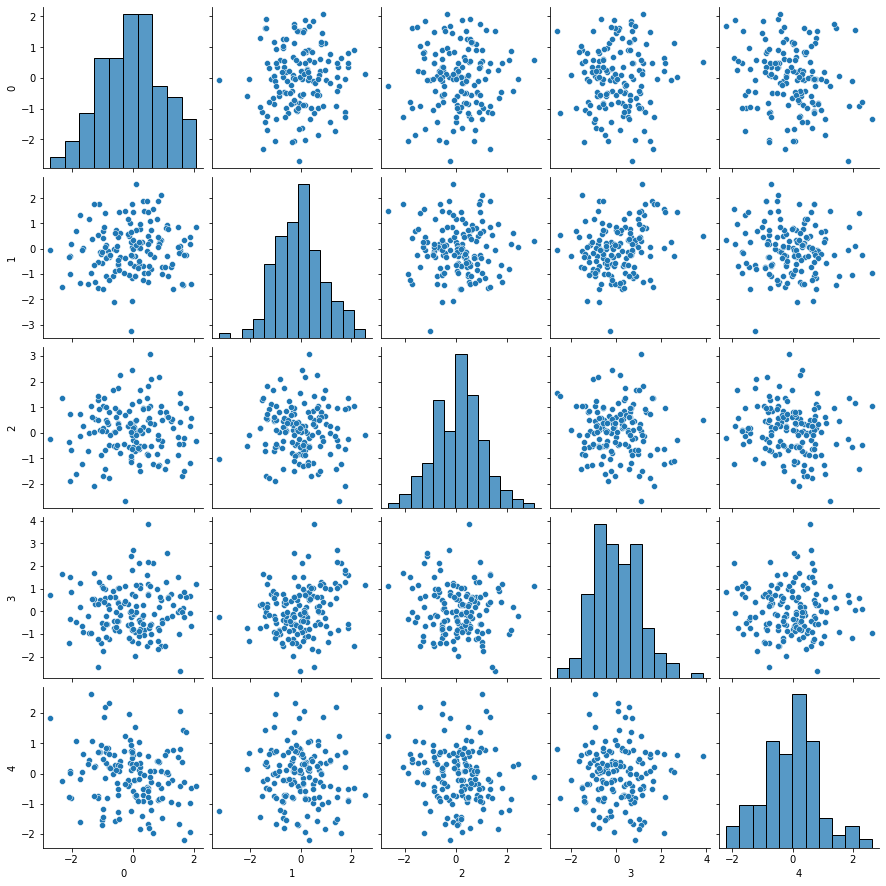

In [178]:
import seaborn as sns 
sns.pairplot(pd.DataFrame(np.random.randn(150, 5)))

# Loading and saving data

## Loading CSV

In [179]:
!unzip ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip

unzip:  cannot find or open ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip, ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip.zip or ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip.ZIP.


In [180]:
df = pd.read_csv('914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv'

In [337]:
df.shape

(146938, 51)

## Saving to Excel

In [340]:
df.head(10000).to_excel('deps.xlsx')

## Saving to CSV

In [341]:
df.head(10000).to_csv('deps.csv')

## To Sql Database

In [349]:
import sqlite3

connection = sqlite3.connect('db.sql')
df.head(10000).to_sql('deps', connection, if_exists='replace')

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/pandas/core/generic.py:2602: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## To dictionary and to json

In [351]:
df.head().to_dict()

{'DEPARTURES_SCHEDULED': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DEPARTURES_PERFORMED': {0: 1.0, 1: 2.0, 2: 1.0, 3: 1.0, 4: 1.0},
 'PAYLOAD': {0: 528.0, 1: 3621.0, 2: 2169.0, 3: 1342.0, 4: 275.0},
 'SEATS': {0: 11.0, 1: 22.0, 2: 11.0, 3: 11.0, 4: 11.0},
 'PASSENGERS': {0: 2.0, 1: 2.0, 2: 2.0, 3: 1.0, 4: 1.0},
 'FREIGHT': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'MAIL': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DISTANCE': {0: 3899.0, 1: 2589.0, 2: 1210.0, 3: 2316.0, 4: 1023.0},
 'RAMP_TO_RAMP': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'AIR_TIME': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'UNIQUE_CARRIER': {0: '10Q', 1: '10Q', 2: '10Q', 3: '10Q', 4: '10Q'},
 'AIRLINE_ID': {0: 21407.0, 1: 21407.0, 2: 21407.0, 3: 21407.0, 4: 21407.0},
 'UNIQUE_CARRIER_NAME': {0: 'Swiss Air Ambulance',
  1: 'Swiss Air Ambulance',
  2: 'Swiss Air Ambulance',
  3: 'Swiss Air Ambulance',
  4: 'Swiss Air Ambulance'},
 'UNIQUE_CARRIER_ENTITY': {0: '71084',
  1: '71084',
  2: '71084',
  3: '71084',
  4

In [352]:
df.head().to_json()

'{"DEPARTURES_SCHEDULED":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DEPARTURES_PERFORMED":{"0":1.0,"1":2.0,"2":1.0,"3":1.0,"4":1.0},"PAYLOAD":{"0":528.0,"1":3621.0,"2":2169.0,"3":1342.0,"4":275.0},"SEATS":{"0":11.0,"1":22.0,"2":11.0,"3":11.0,"4":11.0},"PASSENGERS":{"0":2.0,"1":2.0,"2":2.0,"3":1.0,"4":1.0},"FREIGHT":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"MAIL":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DISTANCE":{"0":3899.0,"1":2589.0,"2":1210.0,"3":2316.0,"4":1023.0},"RAMP_TO_RAMP":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"AIR_TIME":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"UNIQUE_CARRIER":{"0":"10Q","1":"10Q","2":"10Q","3":"10Q","4":"10Q"},"AIRLINE_ID":{"0":21407.0,"1":21407.0,"2":21407.0,"3":21407.0,"4":21407.0},"UNIQUE_CARRIER_NAME":{"0":"Swiss Air Ambulance","1":"Swiss Air Ambulance","2":"Swiss Air Ambulance","3":"Swiss Air Ambulance","4":"Swiss Air Ambulance"},"UNIQUE_CARRIER_ENTITY":{"0":"71084","1":"71084","2":"71084","3":"71084","4":"71084"},"REGION":{"0":"I","1":"I","2":

## Reading Excel

In [353]:
pd.read_excel('deps.xlsx')

Unnamed: 0  DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  \
0              0                     0                     1      528     11   
1              1                     0                     2     3621     22   
2              2                     0                     1     2169     11   
3              3                     0                     1     1342     11   
4              4                     0                     1      275     11   
...          ...                   ...                   ...      ...    ...   
9995        9995                     0                     1    35000    150   
9996        9996                     0                     1    35000    150   
9997        9997                     0                     1    35000    150   
9998        9998                     0                     1    35000    162   
9999        9999                     0                     1    35000    150   

      PASSENGERS  FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  ...  AIRCRAFT_GROUP  \
0              2        0     0      3899             0  ...               6   
1              2        0     0      2589             0  ...               6   
2              2        0     0      1210             0  ...               6   
3              1        0     0      2316             0  ...               6   
4              1        0     0      1023             0  ...               6   
...          ...      ...   ...       ...           ...  ...             ...   
9995          29        0     0       552           115  ...               6   
9996          45        0     0       350            70  ...               6   
9997          30        0     0       609           118  ...               6   
9998         111        0     0      1571           265  ...               6   
9999          42        0     0       794           135  ...               6   

     AIRCRAFT_TYPE  AIRCRAFT_CONFIG  YEAR QUARTER MONTH DISTANCE_GROUP CLASS  \
0              669                1  2015       1     1              8     L   
1              669                1  2015       1     1              6     L   
2              669                1  2015       1     1              3     L   
3              669                1  2015       1     1              5     L   
4              669                1  2015       1     1              3     L   
...            ...              ...   ...     ...   ...            ...   ...   
9995           617                1  2015       1     1              2     L   
9996           617                1  2015       1     1              1     L   
9997           617                1  2015       1     1              2     L   
9998           617                1  2015       1     1              4     L   
9999           617                1  2015       1     1              2     L   

      DATA_SOURCE  Unnamed: 50  
0              IF          NaN  
1              IF          NaN  
2              DF          NaN  
3              IF          NaN  
4              DF          NaN  
...           ...          ...  
9995           DU          NaN  
9996           DU          NaN  
9997           DU          NaN  
9998           DU          NaN  
9999           DU          NaN  

[10000 rows x 52 columns]

In [358]:
accidents = pd.read_excel('01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', 
                          sheet_name='2010', 
                          skiprows=7,
                          skipfooter=1)
accidents

DISTRITO_ACCIDENTE  COLISIÓN DOBLE                            \
0   ARGANZUELA                                                           403   
1   BARAJAS                                                               62   
2   CARABANCHEL                                                          357   
3   CENTRO                                                               546   
4   CHAMARTIN                                                            460   
5   CHAMBERI                                                             361   
6   CIUDAD LINEAL                                                        404   
7   FUENCARRAL-EL PARDO                                                  294   
8   HORTALEZA                                                            183   
9   LATINA                                                               273   
10  MONCLOA-ARAVACA                                                      350   
11  MORATALAZ                                                            127   
12  PUENTE DE VALLECAS                                                   324   
13  RETIRO                                                               349   
14  SALAMANCA                                                            506   
15  SAN BLAS                                                             274   
16  TETUAN                                                               331   
17  USERA                                                                178   
18  VICALVARO                                                             65   
19  VILLA DE VALLECAS                                                    124   
20  VILLAVERDE                                                           147   

    COLISIÓN MÚLTIPLE                         \
0                                         48   
1                                          5   
2                                         35   
3                                         43   
4                                         67   
5                                         34   
6                                         79   
7                                         49   
8                                         15   
9                                         37   
10                                        47   
11                                        21   
12                                        44   
13                                        55   
14                                        44   
15                                        27   
16                                        25   
17                                        36   
18                                         4   
19                                         9   
20                                        21   

    CHOQUE CON OBJETO FIJO                    \
0                                        103   
1                                         34   
2                                        133   
3                                        142   
4                                        128   
5                                         86   
6                                        120   
7                                        165   
8                                         68   
9                                         93   
10                                       177   
11                                        58   
12                                       157   
13                                        33   
14                                       131   
15                                        62   
16                                        87   
17                                        78   
18                                        60   
19                                        63   
20                                        58   

    ATROPELLO                                 \
0                                         75   
1                                         22 

#### Exercise

Consolidate the excel into one DataFrame: you will need to create a 'YEAR' column. Think how you can iterate through all the DataFrames. Think also where you can take the value of 'YEAR' from.

In [184]:
pd.ExcelFile?

In [190]:
type(pd.read_excel('../01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', sheet_name=None))

dict

In [187]:
for sheet, df in pd.read_excel('../01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', sheet_name=None).items():
    print(sheet)

2009
2010
2011
2012
2013
2014
2015
2016


## Reading mysql database

In [362]:
cxn = sqlite3.connect('db.sql')
pd.read_sql('SELECT * FROM deps WHERE "DEPARTURES_PERFORMED" > 5', cxn)

index  DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED    PAYLOAD   SEATS  \
0        14                   0.0                   9.0   562962.0  2548.0   
1        15                   0.0                  18.0  1237995.0  5159.0   
2        16                   0.0                   9.0   565173.0  2595.0   
3        17                   0.0                  18.0  1237436.0  5109.0   
4        19                   0.0                   9.0   910800.0  2835.0   
...     ...                   ...                   ...        ...     ...   
3181   9919                   0.0                   6.0   129000.0     0.0   
3182   9953                   0.0                   9.0   315000.0  1458.0   
3183   9982                   0.0                   9.0   315000.0  1458.0   
3184   9983                   0.0                   8.0   280000.0  1284.0   
3185   9986                   0.0                   8.0   280000.0  1284.0   

      PASSENGERS  FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  ...  AIRCRAFT_GROUP  \
0         2154.0      0.0   0.0    2188.0           0.0  ...               6   
1         4905.0      0.0   0.0    1873.0           0.0  ...               6   
2         2156.0      0.0   0.0    2188.0           0.0  ...               6   
3         4855.0      0.0   0.0    1873.0           0.0  ...               6   
4         1666.0   2882.0   0.0    4879.0           0.0  ...               6   
...          ...      ...   ...       ...           ...  ...             ...   
3181         0.0      0.0   0.0     194.0         304.0  ...               6   
3182      1012.0      0.0   0.0    1396.0        2009.0  ...               6   
3183      1005.0      0.0   0.0    1396.0        2265.0  ...               6   
3184      1030.0      0.0   0.0    1667.0        1923.0  ...               6   
3185       936.0      0.0   0.0    1667.0        2110.0  ...               6   

     AIRCRAFT_TYPE  AIRCRAFT_CONFIG  YEAR QUARTER MONTH DISTANCE_GROUP CLASS  \
0              696                1  2015       1     1              5     F   
1              696                1  2015       1     1              4     F   
2              696                1  2015       1     1              5     F   
3              696                1  2015       1     1              4     F   
4              696                1  2015       1     1             10     F   
...            ...              ...   ...     ...   ...            ...   ...   
3181           635                2  2015       1     1              1     P   
3182           617                1  2015       1     1              3     L   
3183           617                1  2015       1     1              3     L   
3184           617                1  2015       1     1              4     L   
3185           617                1  2015       1     1              4     L   

      DATA_SOURCE  Unnamed: 50  
0              IF         None  
1              IF         None  
2              IF         None  
3              IF         None  
4              IF         None  
...           ...          ...  
3181           IU         None  
3182           IU         None  
3183           IU         None  
3184           IU         None  
3185           IU         None  

[3186 rows x 52 columns]

# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

[Linear Algebra for AI](https://github.com/fastai/fastai/blob/master/tutorials/linalg_pytorch.ipynb)